## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing our dataset in variable df
df = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

In [3]:
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [4]:
df.description[5]

'Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 17.9+ MB


In [6]:
df.shape

(129971, 13)

In [7]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(119988, 13)

In [8]:
def missing(df):
  perc_missing = (df.isnull().sum()*100 / len(df)).round(2)
  missing_value_df = pd.DataFrame({'num_missing' : df.isnull().sum(),
                                   'perc_missing' : perc_missing})
  missing_value_df = missing_value_df[missing_value_df.num_missing != 0]
  return missing_value_df.sort_values(by='perc_missing', ascending=False)

In [9]:
missing(df)

,num_missing,perc_missing
region_2,73219,61.02
designation,34545,28.79
taster_twitter_handle,29446,24.54
taster_name,24917,20.77
region_1,19560,16.30
price,8395,7.00
country,59,0.05
province,59,0.05
variety,1,0.00


In [10]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [11]:
# df = df.drop(columns=['region_2'])
df['country'] = df['country'].fillna('US')
df['province'] = df['province'].fillna('California')
df['price'] = df['price'].fillna(df['price'].mean())
df['designation'] = df['designation'].fillna('NAN')
df['region_1'] = df['region_1'].fillna('NAN')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('NAN')
df['taster_name'] = df['taster_name'].fillna('NAN')
df['variety'] = df['variety'].fillna('NAN')

In [12]:
missing(df)

,num_missing,perc_missing
region_2,73219,61.02


In [13]:
print("Statistics of numerical data: ")
print(df.describe())

Statistics of numerical data: 
              points          price
count  119988.000000  119988.000000
mean       88.442236      35.620747
std         3.092915      40.604109
min        80.000000       4.000000
25%        86.000000      18.000000
50%        88.000000      28.000000
75%        91.000000      40.000000
max       100.000000    3300.000000


# **Target Variable Distribution**

In [14]:
def show_dist(df,var):
  fig = plt.figure(constrained_layout=True,figsize=(10,5))
  grid = gridspec.GridSpec(ncols=3,nrows=1,figure=fig)

  ax1 = fig.add_subplot(grid[0, :2])
  ax1.set_title('Histogram of %s' %var)
  sns.distplot(df.loc[:,var],ax = ax1)

  ax2 = fig.add_subplot(grid[0,2])
  ax2.set_title('Boxplot of %s' %var)
  sns.boxplot(y=df.loc[:,var], ax=ax2)

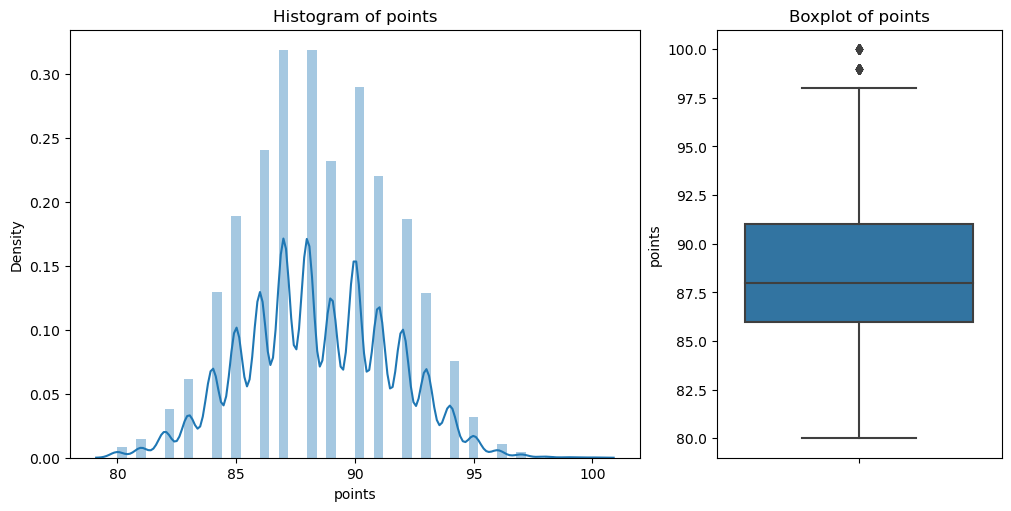

In [15]:
show_dist(df,'points')

In [16]:
df.points.value_counts().sort_index()

80       397
81       689
82      1814
83      2963
84      6225
85      9067
86     11526
87     15279
88     15291
89     11147
90     13893
91     10559
92      8951
93      6170
94      3625
95      1514
96       521
97       228
98        77
99        33
100       19
Name: points, dtype: int64

In [17]:
scores = [['95-100', 'Classic: a great wine'],
           ['90-94', 'Outstanding : a winr of superior character and style'],
           ['85-89','Very good : a wine with special qualities'],
           ['80-84','Good : a solid,well-made wine'],
           ['75-79','Mediocre : a drinkable wine that maye have minor flaws'],
           ['50-74','Not recommended']]

wine_scores = pd.DataFrame(columns=['Score','Explanation'], data=scores)

wine_scores

,Score,Explanation
0,95-100,Classic: a great wine
1,90-94,Outstanding : a winr of superior character and...
2,85-89,Very good : a wine with special qualities
3,80-84,"Good : a solid,well-made wine"
4,75-79,Mediocre : a drinkable wine that maye have min...
5,50-74,Not recommended


# **Features Distribution**

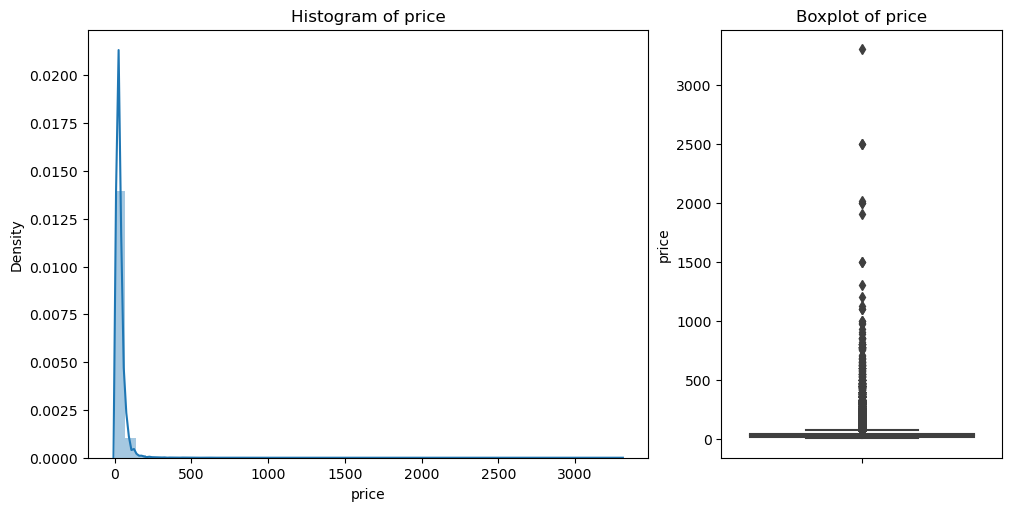

In [18]:
show_dist(df,'price')

In [19]:
df[df.price > 1500]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1558,France,"A massive wine for Margaux, packed with tannin...",NAN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
15714,France,The wine is a velvet glove in an iron fist. Th...,NAN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
62713,France,This extravagantly perfumed wine has great jui...,NAN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
76317,France,This ripe wine shows plenty of blackberry frui...,NAN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
92592,France,"A superb wine from a great year, this is power...",NAN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
105889,France,"A wonderfully complete wine, with all the elem...",NAN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
111765,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair


Text(0, 0.5, 'Points')

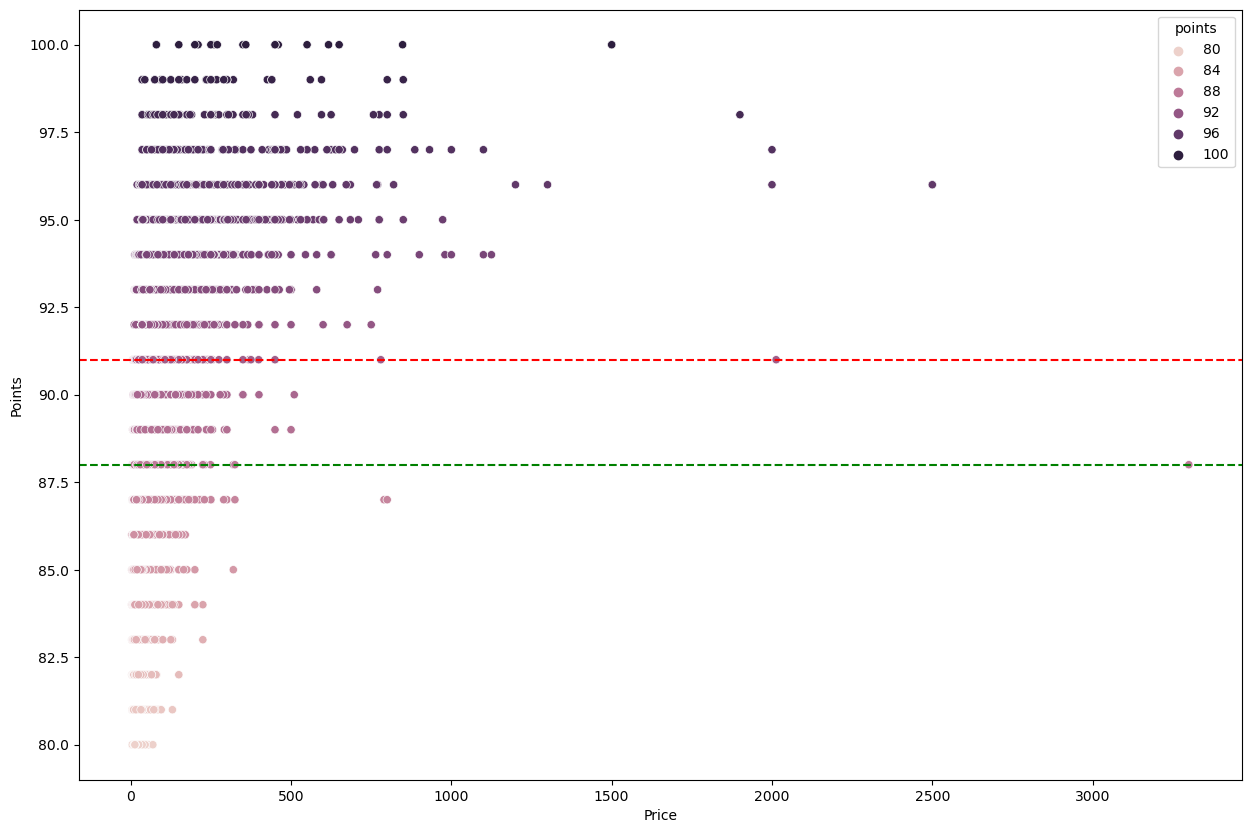

In [20]:
plt.figure(figsize=(15, 10))
g = sns.scatterplot(
    data=df, x="price", y="points", hue="points",
)
g.axhline(88, linestyle='--', color='g')
g.axhline(91, linestyle='--', color='r')
plt.xlabel("Price")
plt.ylabel("Points")

#  Top 20 frequent wine producing countries & their pricing, wine point score comparison

In [21]:
df['log_price'] = np.log(df['price'])

In [22]:
# Function to plot top 20 column features w.r.t target
def top20colFeatPlot(df, col):
    plt.figure(figsize=(20,15))
    col_name = col
    top20_col = df[col].value_counts()[:20]
    plt.subplot(3,1,1)
    a = sns.countplot(x=col,
                      data=df.loc[(df[col].isin(top20_col.index.values))],
                      color=sns.xkcd_rgb['wine'])
    a.set_title(f"Top 20 Most frequent Wine Producing {col_name.capitalize()}", fontsize=15)
    a.set_xlabel(" ", fontsize=15)
    a.set_ylabel("Count", fontsize=15)
    a.set_xticklabels(a.get_xticklabels(),rotation=90)

    plt.subplot(3,1,2)
    b = sns.boxplot(y='points', x=col,
                      data=df.loc[(df[col].isin(top20_col.index.values))],
                     color=sns.xkcd_rgb['wine'])
    b.axhline(88, linestyle='--', color='darkgreen',linewidth = 4)
    b.axhline(91, linestyle='--', color='r', linewidth = 4)
    b.set_title(f"Points Distribution of Wine by {col_name.capitalize()}", fontsize=15)
    b.set_xlabel(f"{col_name}", fontsize=15)
    b.set_ylabel("Points", fontsize=15)
    b.set_xticklabels(b.get_xticklabels(),rotation=90)


    plt.subplots_adjust(hspace = 0.7,top = 0.9)
    plt.subplot(3,1,3)
    c = sns.boxplot(y='log_price', x=col,
                      data=df.loc[(df[col].isin(top20_col.index.values))],
                     color=sns.xkcd_rgb['wine'])
    c.set_title(f"Price Distribution of Wine by {col_name.capitalize()}", fontsize=15)
    c.set_xlabel("", fontsize=15)
    c.set_ylabel("Price", fontsize=15)
    c.set_xticklabels(c.get_xticklabels(),rotation=90)
    plt.show()


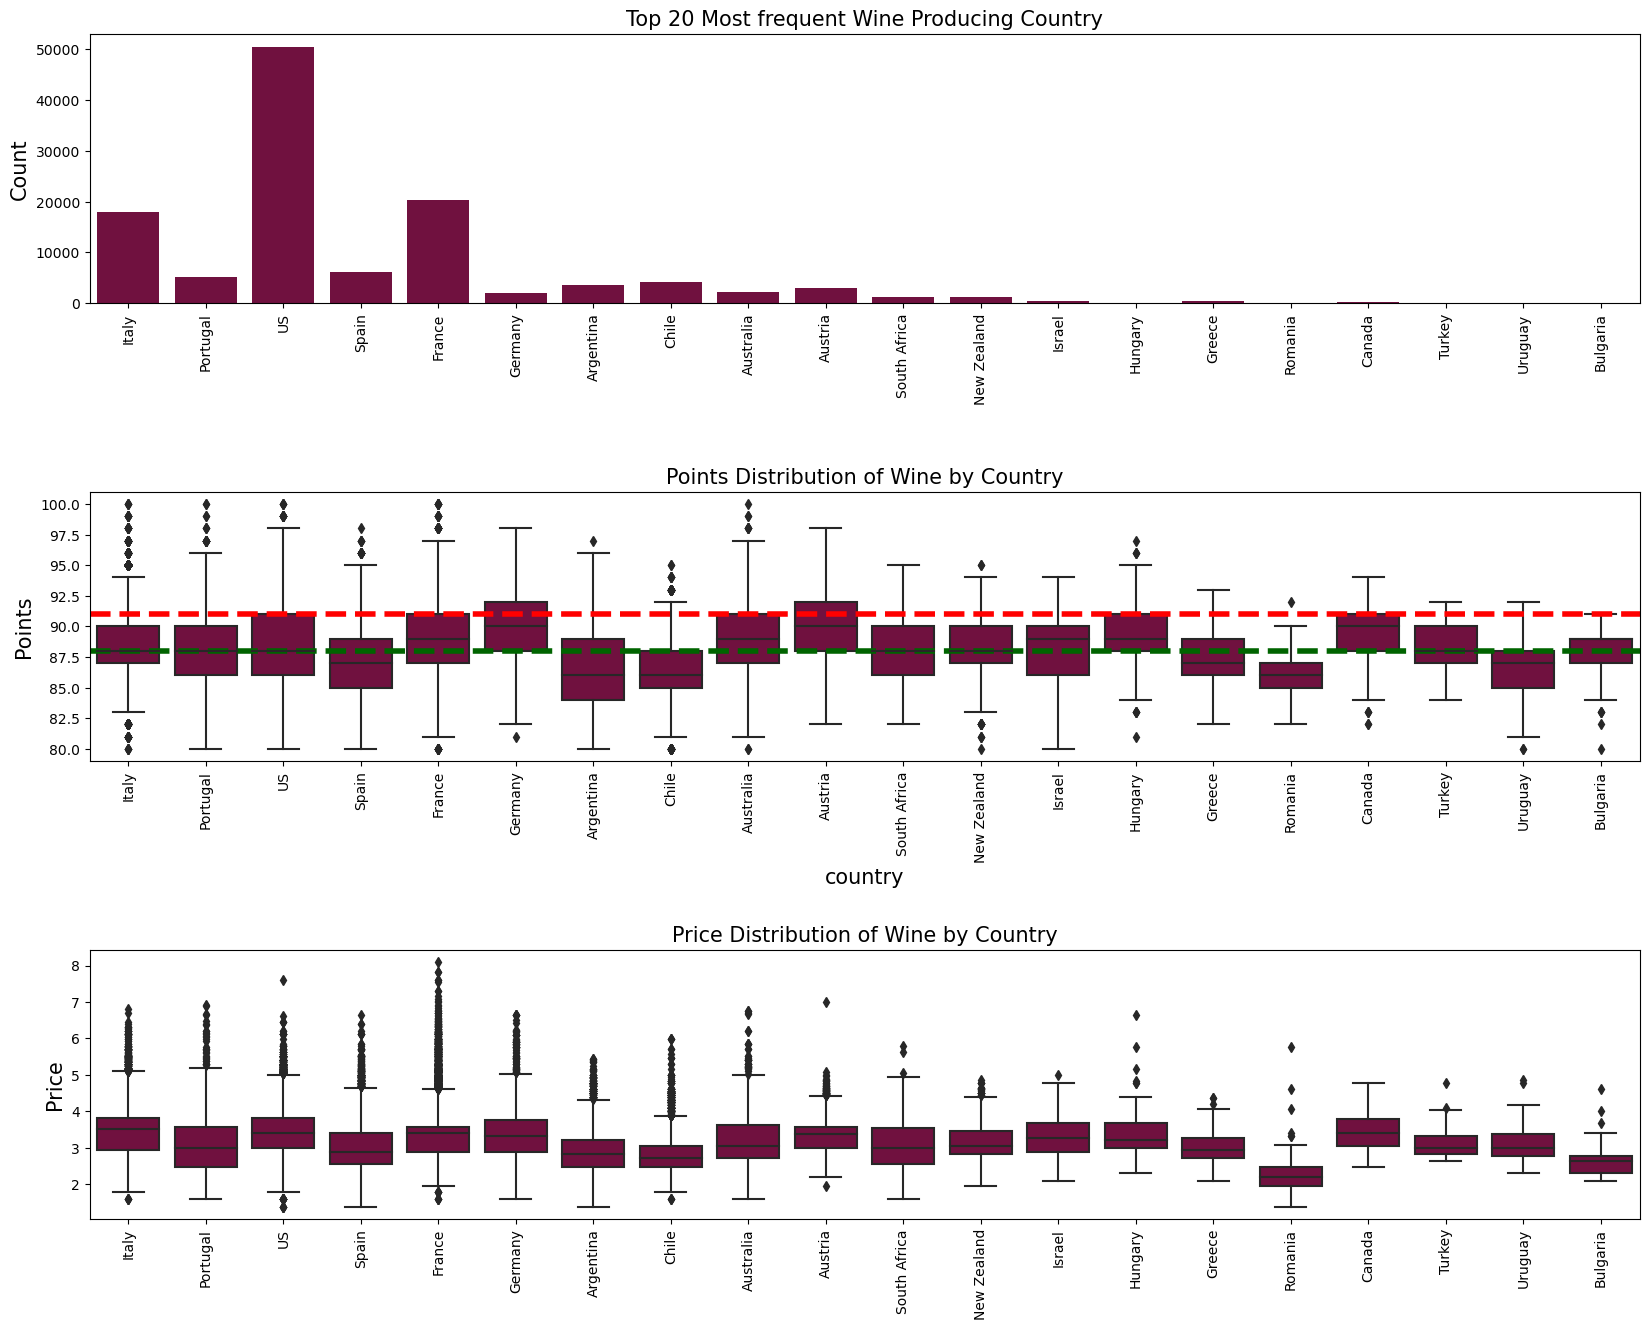

In [23]:
top20colFeatPlot(df, col = 'country')

# Top 5 wineries

[Text(0, 0, 'Chambers Rosewood Vineyards'),
 Text(1, 0, 'Charles Smith'),
 Text(2, 0, "Tenuta dell'Ornellaia"),
 Text(3, 0, 'Avignonesi'),
 Text(4, 0, 'Verité')]

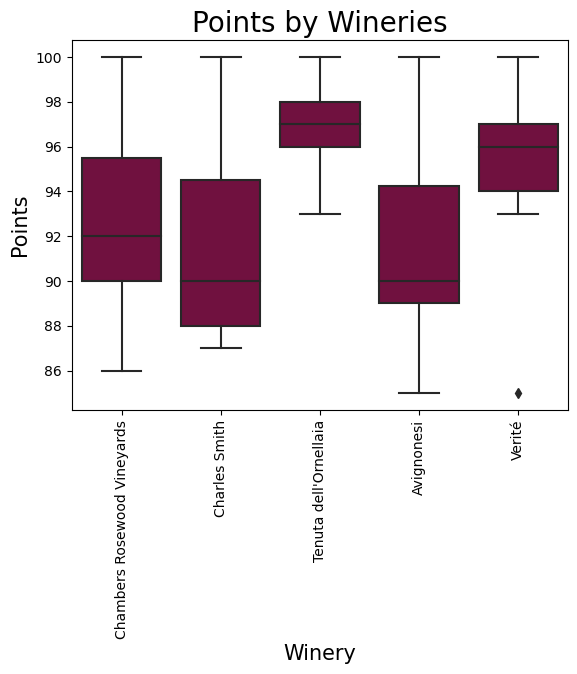

In [24]:
topwinery = df.sort_values(['points'], ascending = False).head(5)['winery'].to_list()
g2 = sns.boxplot(y='points', x='winery',
                  data=df.loc[(df.winery.isin(topwinery))],
                 color=sns.xkcd_rgb['wine'])
g2.set_title("Points by Wineries", fontsize=20)
g2.set_xlabel("Winery", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)


# Wineyards that produces best wine

In [25]:
topvineyard = list(df[df['points']==100]['designation'].unique())

[Text(0, 0, 'NAN'),
 Text(1, 0, 'Riserva'),
 Text(2, 0, 'Brut'),
 Text(3, 0, 'Rare'),
 Text(4, 0, 'Occhio di Pernice'),
 Text(5, 0, 'Masseto'),
 Text(6, 0, 'Le Mesnil Blanc de Blancs Brut'),
 Text(7, 0, 'Bionic Frog'),
 Text(8, 0, 'Barca-Velha'),
 Text(9, 0, 'Royal City'),
 Text(10, 0, 'La Muse'),
 Text(11, 0, 'Cristal Vintage Brut'),
 Text(12, 0, 'Nacional Vintage'),
 Text(13, 0, 'Cerretalto')]

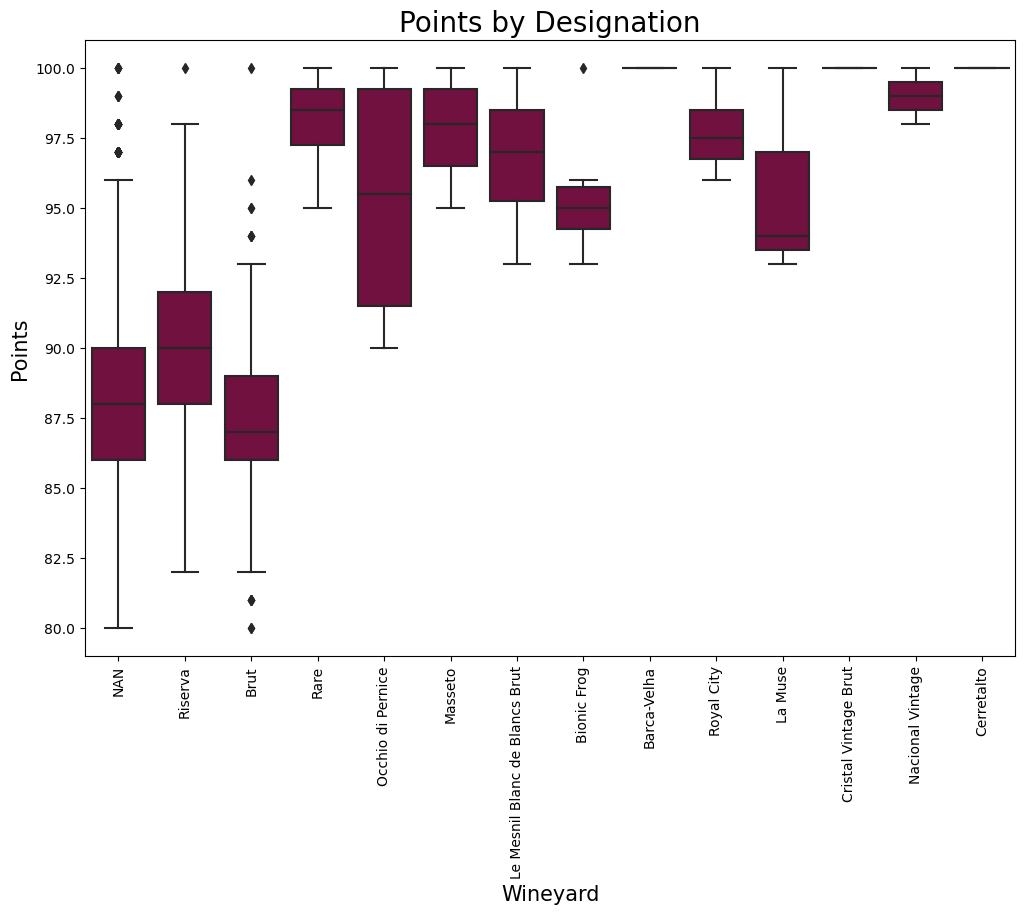

In [26]:
plt.figure(figsize=(12,8))
topvineyard = list(df[df['points']==100]['designation'].unique())

#topvineyard = wdata.sort_values(['points'], ascending = False).head(5)['designation'].to_list()
g2 = sns.boxplot(y='points', x='designation',
                  data=df.loc[(df.designation.isin(topvineyard))],
                 color=sns.xkcd_rgb['wine'])
g2.set_title("Points by Designation", fontsize=20)
g2.set_xlabel("Wineyard", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

[Text(0, 0, 'NAN'),
 Text(1, 0, 'Riserva'),
 Text(2, 0, 'Brut'),
 Text(3, 0, 'Rare'),
 Text(4, 0, 'Occhio di Pernice'),
 Text(5, 0, 'Masseto'),
 Text(6, 0, 'Le Mesnil Blanc de Blancs Brut'),
 Text(7, 0, 'Bionic Frog'),
 Text(8, 0, 'Barca-Velha'),
 Text(9, 0, 'Royal City'),
 Text(10, 0, 'La Muse'),
 Text(11, 0, 'Cristal Vintage Brut'),
 Text(12, 0, 'Nacional Vintage'),
 Text(13, 0, 'Cerretalto')]

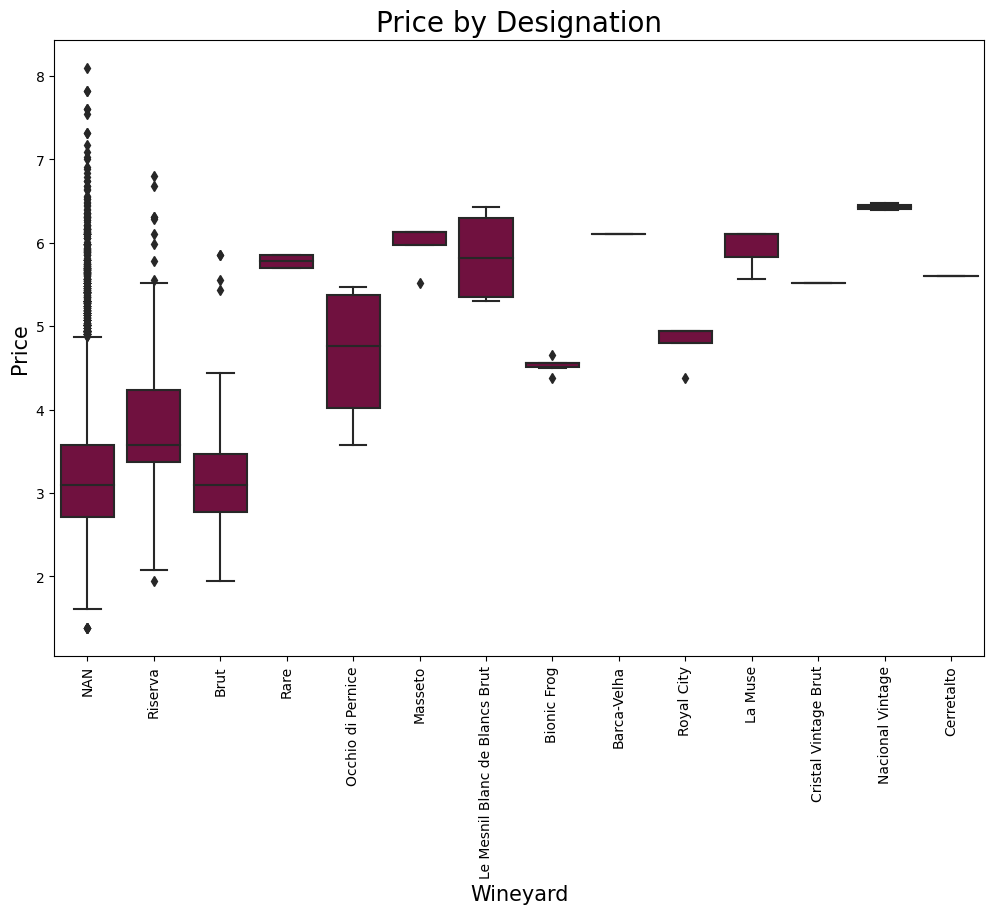

In [27]:
plt.figure(figsize=(12,8))
topvineyard = list(df[df['points']==100]['designation'].unique())

#topvineyard = df.sort_values(['points'], ascending = False).head(5)['designation'].to_list()
g2 = sns.boxplot(y='log_price', x='designation',
                  data=df.loc[(df.designation.isin(topvineyard))],
                 color=sns.xkcd_rgb['wine'])
g2.set_title("Price by Designation", fontsize=20)
g2.set_xlabel("Wineyard", fontsize=15)
g2.set_ylabel("Price", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

#If you had to pick 3 wines to recommend using only this data, which would you pick?

In [28]:
top_3_wines = df[df['points']==100].sort_values(['log_price', 'description'], ascending = [True, False]).head(3)
top_3_wines

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,log_price
114507,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,4.382027
106227,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,4.382027
56308,France,"This is a magnificently solid wine, initially ...",NAN,100,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton,5.010635


#Lastly, if I typically enjoy a wine which is “dry” and has “citrus” flavours, which variety of wine should I try?

In [29]:
dry_citrus_wines = df[(df['description'].str.contains("dry")) & (df['description'].str.contains("citrus"))]
top_dry_citrus_wines = dry_citrus_wines.sort_values(['points','log_price', 'description'], ascending = [False, True,False]).head(3)

In [30]:
top_dry_citrus_wines['variety'].unique()

array(['Pinot Noir', 'Riesling'], dtype=object)

# **WordCloud**

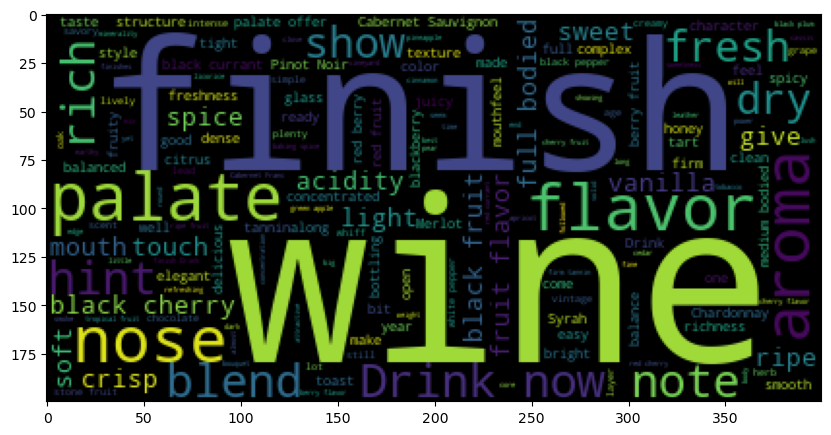

In [31]:
from wordcloud import WordCloud

description_str_all = ''.join(df['description'].tolist())
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(description_str_all))

# Text Preprocessing

# **Lower Casing**

In [32]:
df['description'] = df['description'].str.lower()

In [33]:
df['description'].head()

0    aromas include tropical fruit, broom, brimston...
1    this is ripe and fruity, a wine that is smooth...
2    tart and snappy, the flavors of lime flesh and...
3    pineapple rind, lemon pith and orange blossom ...
4    much like the regular bottling from 2012, this...
Name: description, dtype: object

# **Punctuation Removal**

In [34]:
import string
import re

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_extra(text):
    text = re.sub('--', '', text)  # Remove double hyphens
    text = re.sub('["“”]', '', text)  # Remove double quotes and smart quotes
    return text

# Correct the column name and apply the functions to the 'description' column
df['description'] = df['description'].apply(remove_punctuation_extra)
df['description'] = df['description'].apply(remove_punctuation)

In [35]:
df['description'].head()

0    aromas include tropical fruit broom brimstone ...
1    this is ripe and fruity a wine that is smooth ...
2    tart and snappy the flavors of lime flesh and ...
3    pineapple rind lemon pith and orange blossom s...
4    much like the regular bottling from 2012 this ...
Name: description, dtype: object

# **Stopwords Removal & Tokenization**

In [36]:
df['description'].str.split(' ').str.len().sum()

4850350

In [37]:
import nltk
nltk.download('stopwords')

def remove_stopwords(text):
  stopwords = nltk.corpus.stopwords.words('english')
  removed = [i for i in text.split() if i not in stopwords]
  return removed

[nltk_data] Downloading package stopwords to C:\Users\Vaishnavi
[nltk_data]     Kshirsagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
df['description'] = df['description'].apply(remove_stopwords)
df['description'].head()

0    [aromas, include, tropical, fruit, broom, brim...
1    [ripe, fruity, wine, smooth, still, structured...
2    [tart, snappy, flavors, lime, flesh, rind, dom...
3    [pineapple, rind, lemon, pith, orange, blossom...
4    [much, like, regular, bottling, 2012, comes, a...
Name: description, dtype: object

# **Stemming**

In [39]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stemming(text):
  stem_text =[stemmer.stem(word) for word in text]
  return stem_text

In [40]:
df_wo_stemmming = df.copy()

df['description'] = df['description'].apply(stemming)
df['description'].head()

0    [aroma, includ, tropic, fruit, broom, brimston...
1    [ripe, fruiti, wine, smooth, still, structur, ...
2    [tart, snappi, flavor, lime, flesh, rind, domi...
3    [pineappl, rind, lemon, pith, orang, blossom, ...
4    [much, like, regular, bottl, 2012, come, acros...
Name: description, dtype: object

# **Word Count**

In [41]:
from collections import Counter

# Join all descriptions into a single string
description_str_all = ' '.join(df['description'].astype(str))

# Create a Counter object
counter = Counter(description_str_all.split())

# Sort the Counter by value (word count) and select the first 25 items
counter_sorted = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True)[:15])

# Print the first 25 word counters
for word, count in counter_sorted.items():
    print(f'{word}: {count}')

'wine',: 69682
'flavor',: 61671
'fruit',: 52647
'palat',: 34151
'aroma',: 33977
'acid',: 32882
'cherri',: 28751
'tannin',: 27526
'finish',: 25383
'ripe',: 24009
'black',: 23054
'drink',: 21956
'note',: 21731
'dri',: 21107
'spice',: 20345


# **Target Variable Encoding**

In [42]:
# Define a function to categorize points into bins
def points_binning(points):
    if points >= 80 and points <= 84:
        return '80-84'
    elif points >= 85 and points <= 89:
        return '85-89'
    elif points >= 90 and points <= 94:
        return '90-94'
    elif points >= 95 and points <= 100:
        return '95-100'
    else:
        return 'Other'  # Handle values outside defined ranges if needed

# Apply points_binning function to create categorical labels
df['points_category'] = df['points'].apply(points_binning)

In [43]:
df.points.value_counts().sort_index()

80       397
81       689
82      1814
83      2963
84      6225
85      9067
86     11526
87     15279
88     15291
89     11147
90     13893
91     10559
92      8951
93      6170
94      3625
95      1514
96       521
97       228
98        77
99        33
100       19
Name: points, dtype: int64

<Axes: >

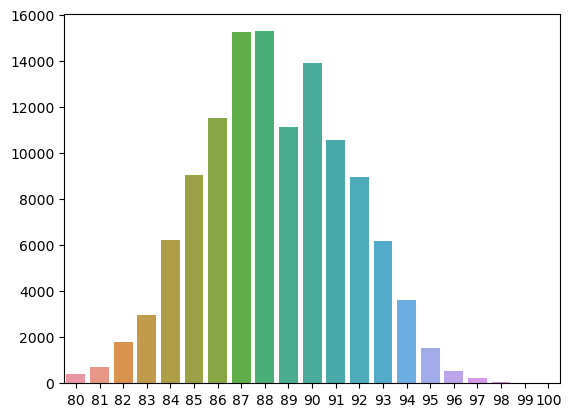

In [44]:
points_dist = df.points.value_counts().sort_index()
sns.barplot(x=points_dist.index, y=points_dist.values)

# Feature selection

In [45]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [46]:
X_df = df[['country', 'designation', 'price','province', 'region_1', 'variety','winery']]
X_df = X_df.apply(LabelEncoder().fit_transform)
X_df.head()

,country,designation,price,province,region_1,variety,winery
0,22,36806,32,331,424,691,11608
1,31,2325,11,108,738,451,12956
2,40,23169,10,268,1218,437,13018
3,40,27975,9,218,549,480,14390
4,40,36466,62,268,1218,441,14621


In [47]:
mutual_info_classif(X_df, df['points'], discrete_features=[0,1,3,4,5,6])

array([0.04478308, 1.12374779, 0.24573266, 0.11052047, 0.22579344,
       0.10558139, 0.88949347])

# Categorial encoding

In [48]:
import pandas as pd

# Define a function to retrieve infrequent values based on a threshold
def get_values(column, threshold):
    value_counts = column.value_counts()
    infrequent_values = value_counts[value_counts <= threshold].index.tolist()
    return infrequent_values

# Make a copy of the original DataFrame
df_other_enc = df.copy()

# Define a function to replace infrequent values with 'Other'
def replace_with_other(column_name, threshold):
    infrequent_values = get_values(df_other_enc[column_name], threshold)
    df_other_enc.loc[df_other_enc[column_name].isin(infrequent_values), column_name] = 'Other'

# Specify the threshold for replacing values with 'Other'
threshold = 100  # Adjust this threshold as needed

# List of categorical columns to encode
categorical_columns = ['country', 'designation', 'province', 'region_1', 'variety', 'winery']

# Apply the replacement logic to each categorical column
for column in categorical_columns:
    replace_with_other(column, threshold)

# Display the updated DataFrame
print(df_other_enc.head())


    country                                        description designation  \
0     Italy  [aroma, includ, tropic, fruit, broom, brimston...       Other   
1  Portugal  [ripe, fruiti, wine, smooth, still, structur, ...       Other   
2        US  [tart, snappi, flavor, lime, flesh, rind, domi...         NAN   
3        US  [pineappl, rind, lemon, pith, orang, blossom, ...       Other   
4        US  [much, like, regular, bottl, 2012, come, acros...       Other   

   points      price           province           region_1           region_2  \
0      87  35.620747  Sicily & Sardinia               Etna                NaN   
1      87  15.000000              Douro                NAN                NaN   
2      87  14.000000             Oregon  Willamette Valley  Willamette Valley   
3      87  13.000000           Michigan              Other                NaN   
4      87  65.000000             Oregon  Willamette Valley  Willamette Valley   

          taster_name taster_twitter_handle 

In [49]:
df_other_enc.winery.value_counts()

Other                         117114
Wines & Winemakers               211
Williams Selyem                  204
Testarossa                       201
DFJ Vinhos                       200
Louis Latour                     192
Georges Duboeuf                  186
Chateau Ste. Michelle            171
Concha y Toro                    154
Columbia Crest                   146
Kendall-Jackson                  119
Gary Farrell                     118
Siduri                           113
Lynmar                           113
Albert Bichot                    109
Santa Ema                        109
Trapiche                         108
Montes                           106
Robert Mondavi                   106
Undurraga                        105
Jean-Luc and Paul Aegerter       103
Name: winery, dtype: int64

In [50]:
df_other_enc = df_other_enc.drop(columns='winery')

# feature selection- MI other encoded

In [51]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Drop any non-numeric columns that are not suitable for MI calculation
df_numeric = df.select_dtypes(include=['number'])

# Drop rows with missing values, as MI calculation cannot handle NaNs
df_numeric.dropna(inplace=True)

# Separate the target variable ('points') from the features
X = df_numeric.drop(columns=['points'])
y = df_numeric['points']

# Calculate Mutual Information
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to display the MI scores for each feature
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df.sort_values(by='MI Score', ascending=False, inplace=True)

# Display the MI scores DataFrame
print(mi_scores_df)

     Feature  MI Score
0      price  0.245516
1  log_price  0.242939


In [52]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Specify the categorical columns of interest
categorical_columns = ['country', 'designation', 'province', 'region_1', 'variety']

# Make a copy of the DataFrame containing only the categorical columns of interest
df_categorical = df[categorical_columns].copy()

# Fill missing values in categorical columns with a placeholder (e.g., 'Missing')
df_categorical.fillna('Missing', inplace=True)

# Encode categorical columns using LabelEncoder
for column in categorical_columns:
    le = LabelEncoder()
    df_categorical[column] = le.fit_transform(df_categorical[column])

# Separate the target variable ('points') from the features
X = df_categorical
y = df['points']

# Calculate Mutual Information for categorical variables
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to display the MI scores for each feature
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df.sort_values(by='MI Score', ascending=False, inplace=True)

# Display the MI scores DataFrame
print(mi_scores_df)


       Feature  MI Score
3     region_1  0.165085
1  designation  0.116683
2     province  0.088108
4      variety  0.071569
0      country  0.041826


# FAMD with other encoded

In [53]:
!pip install prince

Defaulting to user installation because normal site-packages is not writeable


# TEXT REPRESNTATION

## SPLITTING DATASET

In [54]:
from sklearn.model_selection import train_test_split

X = df_other_enc['description']
y = df_other_enc['points']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y) 

## Applying bag of words

In [61]:
# Assuming X_train and X_test are lists of descriptions
X_train = [str(desc) for desc in X_train]
X_test = [str(desc) for desc in X_test]

X_combined = X_train + X_test

# Initialize CountVectorizer for Bag-of-Words (BoW) representation
bow = CountVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit on combined data
X_combined_bow = bow.fit_transform(X_combined)

# Transform the training and test data based on the fitted vocabulary
X_train_bow = X_combined_bow[:len(X_train)]
X_test_bow = X_combined_bow[len(X_train):]

X_test_bow = bow.transform(X_test)




In [62]:
X_test_bow.shape

(23998, 1000)

## TF-IDF 

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train is a list of raw text descriptions
X_train = df['description'].astype(str).tolist()  # Ensure descriptions are strings

# Initialize TfidfVectorizer for TF-IDF representation
tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Optionally, transform test data if needed
# X_test = ... # Your test data here
# X_test_tfidf = tfidf.transform(X_test)


In [69]:
# Convert non-string entries to strings (if needed)
df[text_column] = df[text_column].astype(str)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Apply TF-IDF vectorization to the 'description' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column])


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
# Assuming 'df' is your DataFrame containing the dataset
# Replace 'df' with the name of your DataFrame if different
# Example:
# df = pd.read_csv('your_dataset.csv')

# Assuming 'description' is the column containing text data
text_column = 'description'

# Convert non-string entries to strings (if needed)
df[text_column] = df[text_column].astype(str)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Apply TF-IDF vectorization to the 'description' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column])

# Convert TF-IDF matrix to DataFrame (optional, for visualization or further analysis)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print TF-IDF DataFrame (optional)
print("TF-IDF Matrix:")
print(tfidf_df)



TF-IDF Matrix:
         10  100   12   15   20  2007  2008  2009  2010  2011  ...  yellow  \
0       0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
1       0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
2       0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
3       0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
4       0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
...     ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...     ...   
119983  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
119984  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
119985  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
119986  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
119987  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   

        yield  youll  young  youth  zest  zesti 

# NAIVE BAYES baseline model (only text data)

## using BOW


In [88]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y)
X = df['description']
y = df['points']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CountVectorizer to convert text data into BoW representation
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Train the classifier using the Bag-of-Words (BoW) features
nb.fit(X_train_bow, y_train)

# Predict on the test set
y_pred = nb.predict(X_test_bow)

print(classification_report(y_test, nb.predict(X_test_bow)))

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



              precision    recall  f1-score   support

          87       0.00      0.00      0.00         1
          90       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy: 0.5


# USING TF-IDF

In [89]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y)
X = df['description']
y = df['points']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer to convert text data into TF-IDF representation
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Train the classifier using the TF-IDF features
nb.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = nb.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, nb.predict(X_test_tfidf)))


Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

          87       0.00      0.00      0.00         1
          90       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



# random forest using bow

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the text data (description column) using CountVectorizer (Bag-of-Words)
vectorizer = CountVectorizer()
X_description = vectorizer.fit_transform(df['description'])

# Combine the BoW features with other numerical features
X_numerical = df[['points', 'price']]
X_combined = pd.DataFrame(X_description.toarray(), columns=vectorizer.get_feature_names_out()).join(X_numerical)

# Define the target variable (country)
y = df['country']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      France       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# Random forest (Text +Price)

## using BOW

In [107]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Extract relevant columns for modeling
X_text = df['description']  # Text data for BoW representation
X_numeric = df['price']  # Numeric feature

# Convert text data into Bag-of-Words (BoW) representation
vectorizer = CountVectorizer(max_features=1000)
X_text_bow = vectorizer.fit_transform(X_text)

# Combine BoW features with numeric feature (price)
X_combined = pd.DataFrame(X_text_bow.toarray(), columns=vectorizer.get_feature_names_out())
X_combined['price'] = X_numeric  # Add the 'price' column to the combined features

# Define target variable
y = df['country']  # Assuming 'country' is the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      France       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



## using TF-IDF 

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Extract relevant columns for modeling
X_text = df['description']  # Text data for TF-IDF representation
X_numeric = df['price']  # Numeric feature

# Convert text data into TF-IDF representation
vectorizer = TfidfVectorizer(max_features=1000)
X_text_tfidf = vectorizer.fit_transform(X_text)

# Combine TF-IDF features with numeric feature (price)
X_combined = pd.DataFrame(X_text_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
X_combined['price'] = X_numeric  # Add the 'price' column to the combined features

# Define target variable
y = df['country']  # Assuming 'country' is the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_train, rf_classifier.predict(X_train)))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      France       1.00      1.00      1.00         4
          US       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# Support vector machine

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Extract relevant columns for modeling
X_text = df['description']  # Text data for TF-IDF representation
X_numeric = df['price']  # Numeric feature

# Convert text data into TF-IDF representation
vectorizer = TfidfVectorizer(max_features=1000)
X_text_tfidf = vectorizer.fit_transform(X_text)

# Combine TF-IDF features with numeric feature (price)
# Convert TF-IDF matrix to DataFrame for combining with numeric feature
X_text_tfidf_df = pd.DataFrame(X_text_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
X_combined = pd.concat([X_text_tfidf_df, X_numeric], axis=1)  # Combine TF-IDF features with price

# Define target variable
y = df['country']  # Assuming 'country' is the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # Linear kernel for SVM

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      France       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# Decison Tree

In [119]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame containing the dataset
X = df['description'].astype(str).tolist()  # Text data (input feature)
y = df['points']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Initialize CountVectorizer for Bag-of-Words (BoW) representation
bow = CountVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the training data
X_train_bow = bow.fit_transform(X_train)

# Transform the test data using the same vocabulary learned from the training data
X_test_bow = bow.transform(X_test)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data (BoW representation of description)
decision_tree.fit(X_train_bow, y_train)

# Predict on the test data (BoW representation of description)
y_pred = decision_tree.predict(X_test_bow)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

          96       0.50      1.00      0.67         1
          98       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

